# Trumpet plot

Trumpet plots were introduced in the research article

Corte L, Liou L, O'Reilly PF, García-González J. Trumpet plots: visualizing the relationship between allele frequency and effect size in genetic association studies. *GigaByte*. 2023 Sep 1;2023:gigabyte89. doi: 10.46471/gigabyte.89. PMID: 37711278; PMCID: PMC10498096.

and its goal is to visualize effect size of risk variants across the allele frequency spectrum.

In [1]:
import sys
import os

import pandas as pd

# add parent directory to path
library_path = os.path.abspath('..')
if library_path not in sys.path:
    sys.path.append(library_path)

from ideal_genom.visualization.plots import trumpet_draw
from ideal_genom.get_examples import get_trumpet_binary_example

The first example corresponds to a trumpet plot for a binary trait: Parkinson's disease. We are going to use the summary statistics provided in the study:

Park, K.W., Ryu, HS., Shin, E. et al. Ethnicity- and sex-specific genome wide association study on Parkinson’s disease. *npj Parkinsons Dis.* **9**, 141 (2023). https://doi.org/10.1038/s41531-023-00580-3

In [3]:
file_path = get_trumpet_binary_example()

INFO:ideal_genom.get_examples:File already exists: /mnt/DataVol/CGE/IDEAL-GENOM/data/sumstats/GCST90278092.h.tsv


In [4]:
chunk_size = 2000

filtered_chunks=[]

filepath = file_path.as_posix()

for chunk in pd.read_csv(filepath, sep=r'\s+', engine='python', chunksize=chunk_size):
    
    filtered_chunk = chunk[chunk['p_value'] < 5e-4].reset_index(drop=True)
    filtered_chunks.append(filtered_chunk)

df_gwas = pd.concat(filtered_chunks, ignore_index=True)

In [4]:
df_gwas

,chromosome,base_pair_location,effect_allele,other_allele,beta,standard_error,effect_allele_frequency,p_value,rsid,ci_upper,ci_lower,rs_id,hm_coordinate_conversion,odds_ratio,hm_code,variant_id
0,1,4448288,A,C,0.437610,0.117555,0.03884,0.000196,rs17453210,1.950000,1.230000,rs17453210,lo,1.549000,10,1_4448288_C_A
1,1,5179871,T,C,0.215175,0.058771,0.73440,0.000252,rs6603818,1.391401,1.105094,rs6603818,lo,1.240079,11,1_5179871_C_T
2,1,10773175,G,C,0.177309,0.050569,0.45210,0.000447,rs58064215,1.318000,1.081000,rs58064215,lo,1.194000,5,1_10773175_C_G
3,1,23052976,C,T,0.391366,0.107659,0.04595,0.000277,rs117174958,1.827000,1.198000,rs117174958,lo,1.479000,10,1_23052976_T_C
4,1,30735055,T,C,-0.261105,0.071572,0.16510,0.000265,rs1535637,0.886200,0.669400,rs1535637,lo,0.770200,10,1_30735055_C_T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,21,29493976,T,C,0.521172,0.145565,0.02298,0.000347,rs138894787,2.240000,1.266000,rs138894787,lo,1.684000,10,21_29493976_C_T
575,21,33118323,C,T,0.767791,0.173475,0.01559,0.000010,rs142918131,3.028000,1.534000,rs142918131,lo,2.155000,10,21_33118323_T_C
576,22,27091835,G,A,0.291176,0.072012,0.12580,0.000051,rs7288957,1.541000,1.162000,rs7288957,lo,1.338000,10,22_27091835_A_G
577,22,33045977,G,T,0.628075,0.166622,0.01745,0.000162,rs191820406,2.598000,1.352000,rs191820406,lo,1.874000,10,22_33045977_T_G


In [5]:
df_gwas['minor_allele_frequency'] = df_gwas['effect_allele_frequency'].apply(lambda x: min(x, 1-x))

INFO:ideal_genom.visualization.plots:Prevalence not provided. Infering from the number of cases and controls: 0.17
INFO:ideal_genom.power_comp: -GRR is approximated using OR. For prevalence < 10%, GRR is very similar to OR....


 -Updating eaf-beta matrix...


INFO:ideal_genom.power_comp: -Extracting eaf-beta combinations with power = 0.2...
INFO:ideal_genom.power_comp: -Found 1961 eaf-beta combinations with power >= 0.2 and columns: Index(['eaf', 'beta', 'power'], dtype='object')
INFO:ideal_genom.power_comp: -GRR is approximated using OR. For prevalence < 10%, GRR is very similar to OR....


 -Updating eaf-beta matrix...


INFO:ideal_genom.power_comp: -Extracting eaf-beta combinations with power = 0.4...
INFO:ideal_genom.power_comp: -Found 1950 eaf-beta combinations with power >= 0.4 and columns: Index(['eaf', 'beta', 'power'], dtype='object')
INFO:ideal_genom.power_comp: -GRR is approximated using OR. For prevalence < 10%, GRR is very similar to OR....


 -Updating eaf-beta matrix...


INFO:ideal_genom.power_comp: -Extracting eaf-beta combinations with power = 0.6...
INFO:ideal_genom.power_comp: -Found 1940 eaf-beta combinations with power >= 0.6 and columns: Index(['eaf', 'beta', 'power'], dtype='object')


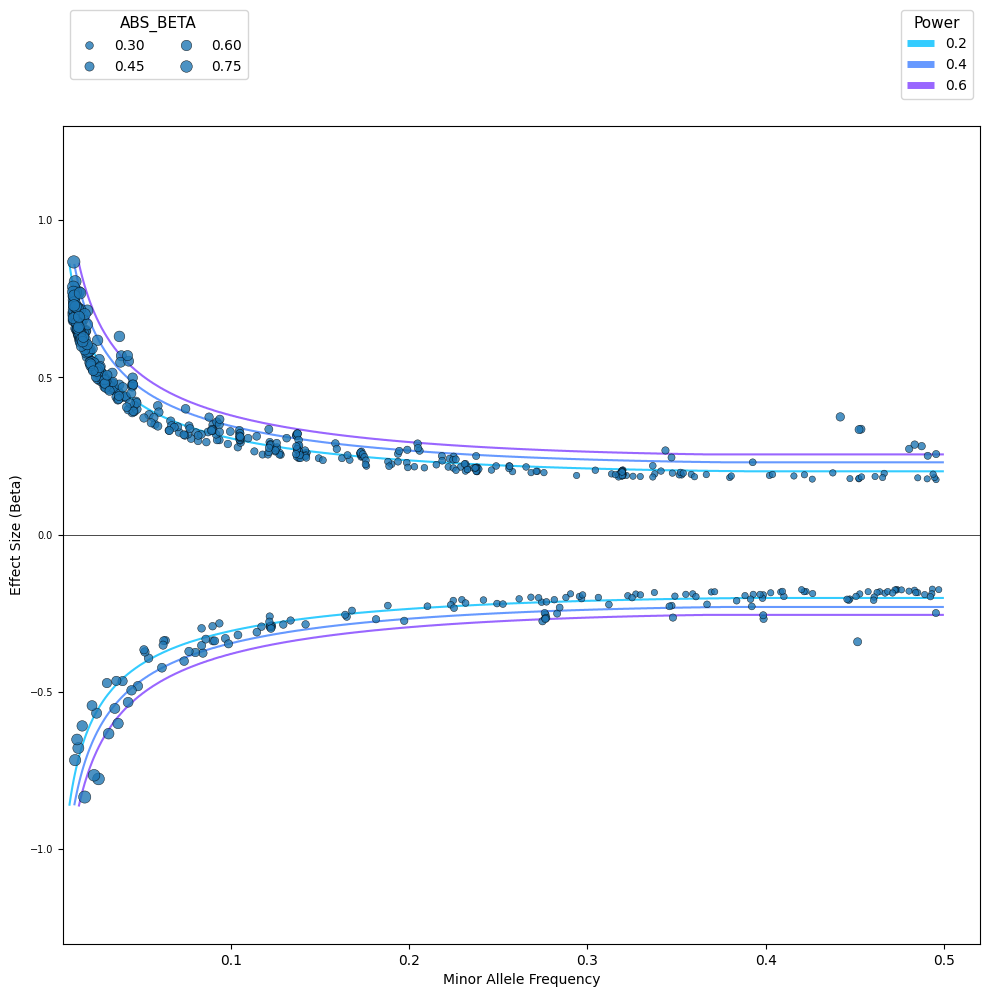

True

In [6]:
trumpet_draw(
    df_gwas    =df_gwas, 
    df_freq    =None, 
    plot_dir   = file_path.parent.as_posix(), 
    snp_col    ="rsid", 
    chr_col    ='chromosome', 
    pos_col    ='base_pair_location',
    maf_col    ='minor_allele_frequency', 
    beta_col   ='beta', 
    power_ts   =[0.2,0.4,0.6], 
    n_case=1050,
    n_control=5000,
    sample_size=6050,
    sample_size_strategy='median', 
    p_col      ='p_value', 
    mode       ='binary', 
    p_filter   =None, 
    save_name  ='trumpet_plot_bin.jpeg',
)

In the cited study, there is not information about top hits so, to try the highlighting, let us check the SNPs with lowest `p-value`.

In [7]:
to_hightlight = df_gwas[df_gwas['p_value'] < 5e-7]['rsid'].tolist()

INFO:ideal_genom.visualization.plots:Prevalence not provided. Infering from the number of cases and controls: 0.17
INFO:ideal_genom.power_comp: -GRR is approximated using OR. For prevalence < 10%, GRR is very similar to OR....


 -Updating eaf-beta matrix...


INFO:ideal_genom.power_comp: -Extracting eaf-beta combinations with power = 0.2...
INFO:ideal_genom.power_comp: -Found 1961 eaf-beta combinations with power >= 0.2 and columns: Index(['eaf', 'beta', 'power'], dtype='object')
INFO:ideal_genom.power_comp: -GRR is approximated using OR. For prevalence < 10%, GRR is very similar to OR....


 -Updating eaf-beta matrix...


INFO:ideal_genom.power_comp: -Extracting eaf-beta combinations with power = 0.4...
INFO:ideal_genom.power_comp: -Found 1950 eaf-beta combinations with power >= 0.4 and columns: Index(['eaf', 'beta', 'power'], dtype='object')
INFO:ideal_genom.power_comp: -GRR is approximated using OR. For prevalence < 10%, GRR is very similar to OR....


 -Updating eaf-beta matrix...


INFO:ideal_genom.power_comp: -Extracting eaf-beta combinations with power = 0.6...
INFO:ideal_genom.power_comp: -Found 1940 eaf-beta combinations with power >= 0.6 and columns: Index(['eaf', 'beta', 'power'], dtype='object')


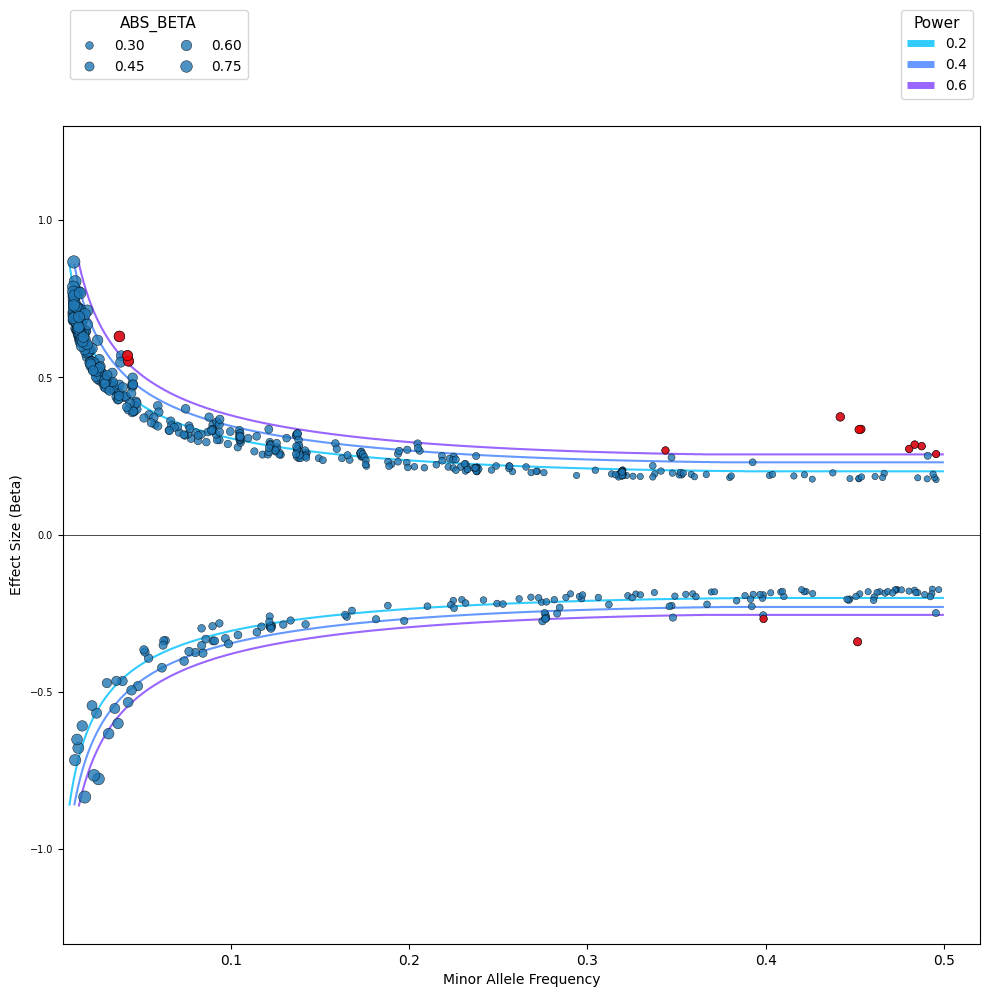

True

In [8]:
trumpet_draw(
    df_gwas    =df_gwas, 
    df_freq    =None, 
    plot_dir   = file_path.parent.as_posix(), 
    snp_col    ="rsid", 
    chr_col    ='chromosome', 
    pos_col    ='base_pair_location',
    maf_col    ='minor_allele_frequency', 
    beta_col   ='beta', 
    power_ts   =[0.2,0.4,0.6], 
    n_case=1050,
    n_control=5000,
    sample_size=6050,
    sample_size_strategy='median', 
    p_col      ='p_value', 
    mode       ='binary', 
    p_filter   =None, 
    save_name  ='trumpet_plot_bin.jpeg',
    to_highlight=to_hightlight
)

In [ ]:
to_annotate = df_gwas[df_gwas['p_value'] < 5e-7][['rsid']].reset_index(drop=True)

,rsid
0,rs708723
1,rs947211
2,rs708726
3,rs954206
4,rs12640100
5,rs11931074
6,rs356204
7,rs356203
8,rs3796661
9,rs17016196


To annotate the plot, it quite easy, just take into account that in this example the build is 37.

INFO:ideal_genom.visualization.plots:Prevalence not provided. Infering from the number of cases and controls: 0.17
INFO:ideal_genom.visualization.plots:Filtering GWAS dataframe with p-value < 5e-05
INFO:ideal_genom.visualization.plots:Number of SNPs in filtered GWAS dataframe: 110
INFO:ideal_genom.power_comp: -GRR is approximated using OR. For prevalence < 10%, GRR is very similar to OR....


 -Updating eaf-beta matrix...


INFO:ideal_genom.power_comp: -Extracting eaf-beta combinations with power = 0.2...
INFO:ideal_genom.power_comp: -Found 1961 eaf-beta combinations with power >= 0.2 and columns: Index(['eaf', 'beta', 'power'], dtype='object')
INFO:ideal_genom.power_comp: -GRR is approximated using OR. For prevalence < 10%, GRR is very similar to OR....


 -Updating eaf-beta matrix...


INFO:ideal_genom.power_comp: -Extracting eaf-beta combinations with power = 0.4...
INFO:ideal_genom.power_comp: -Found 1950 eaf-beta combinations with power >= 0.4 and columns: Index(['eaf', 'beta', 'power'], dtype='object')
INFO:ideal_genom.power_comp: -GRR is approximated using OR. For prevalence < 10%, GRR is very similar to OR....


 -Updating eaf-beta matrix...


INFO:ideal_genom.power_comp: -Extracting eaf-beta combinations with power = 0.6...
INFO:ideal_genom.power_comp: -Found 1940 eaf-beta combinations with power >= 0.6 and columns: Index(['eaf', 'beta', 'power'], dtype='object')
INFO:ideal_genom.visualization.plots:Annotating 13 SNPs with from ensembl with build 37...
INFO:ideal_genom.annotations: -Assigning Gene name using Ensembl GRCh37 for protein coding genes
INFO:ideal_genom.get_references:Latest GTF file: Homo_sapiens.GRCh37.87.chr.gtf.gz
INFO:ideal_genom.get_references:Download URL: https://ftp.ensembl.org/pub/grch37/release-113/gtf/homo_sapiens/Homo_sapiens.GRCh37.87.chr.gtf.gz
INFO:ideal_genom.get_references:File already exists: /mnt/DataVol/CGE/IDEAL-GENOM/data/ensembl_latest/Homo_sapiens.GRCh37.87.chr.gtf.gz
INFO:ideal_genom.get_references:File already exists: /mnt/DataVol/CGE/IDEAL-GENOM/data/ensembl_latest/Homo_sapiens.GRCh37.87.chr.gtf
INFO:ideal_genom.get_references:File already exists: /mnt/DataVol/CGE/IDEAL-GENOM/data/ense

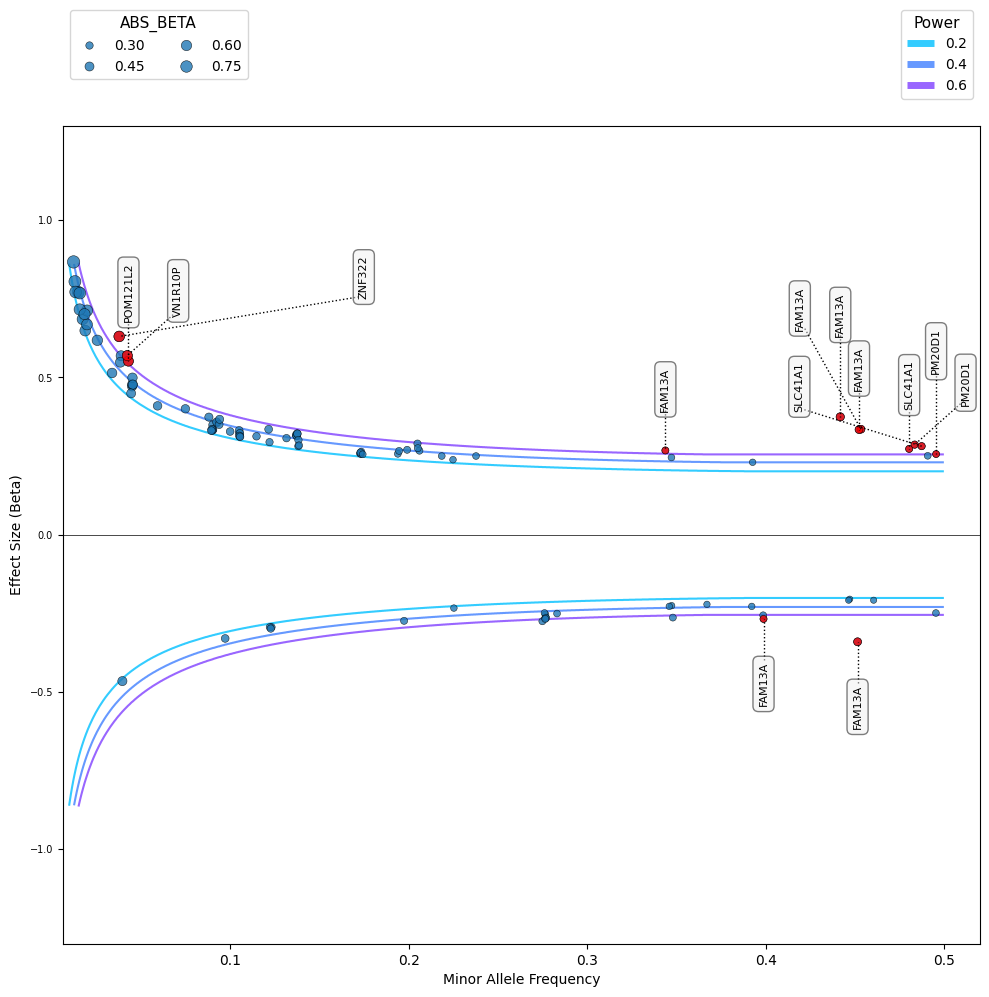

True

In [11]:
trumpet_draw(
    df_gwas    =df_gwas, 
    df_freq    =None, 
    plot_dir   = file_path.parent.as_posix(), 
    snp_col    ="rsid", 
    chr_col    ='chromosome', 
    pos_col    ='base_pair_location',
    maf_col    ='minor_allele_frequency', 
    beta_col   ='beta', 
    power_ts   =[0.2,0.4,0.6], 
    n_case=1050,
    n_control=5000,
    sample_size=6050,
    sample_size_strategy='median', 
    p_col      ='p_value', 
    mode       ='binary', 
    p_filter   =5e-5, 
    save_name  ='trumpet_plot_bin.jpeg',
    to_highlight=to_hightlight,
    to_annotate=to_annotate,
    build='37'
)